In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
path = r"C:\Users\Abhishek Pandey\OneDrive\Desktop\Machine_Learning\Summer2024\archive (1)\flowers\flowers"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [41]:
# view the first 10 flower entries
print(flowers[:10])

['00_001.png', '00_002.png', '00_003.png', '00_004.png', '00_005.png', '00_006.png', '00_007.png', '00_008.png', '00_009.png', '00_010.png']


In [42]:
# load the image as a 224x224 array
img = load_img(flowers[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [43]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [9]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 60s 0us/step


In [15]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx)
    return features

In [44]:
data = {}

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    feat = extract_features(flower,model)
    data[flower] = feat
  
          

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [45]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

# get the unique labels (from the flower_labels.csv)


(603, 4096)

In [46]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [47]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


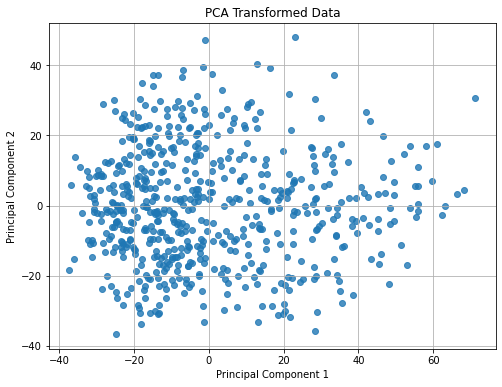

In [48]:
import matplotlib.pyplot as plt

# Assuming x has shape (n_samples, n_components)
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], alpha=0.8)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [51]:
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

In [58]:
best_score = -1
best_k = 2  # Start with at least 2 clusters
for k in range(5, 20):  # Trying different numbers of clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_normalized)
    score = silhouette_score(x_normalized, labels)
    print(score)
    if score > best_score:
        best_score = score
        best_k = k



-0.0108614275
-0.026071476
-0.0027145788
-0.05377278
0.009023399
-0.015556851
-0.021821259
-0.017210739
-0.055649627
-0.0690019
-0.019304203
-0.060462732
-0.017025895
-0.049091093
-0.02197218


In [59]:
print(f"Best number of clusters: {best_k}")

Best number of clusters: 9


In [60]:
kmeans = KMeans(n_clusters=best_k, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=9, random_state=22)

In [61]:
kmeans.labels_

array([6, 6, 6, 6, 6, 4, 6, 4, 6, 4, 6, 6, 6, 4, 0, 6, 0, 6, 6, 6, 6, 6,
       4, 6, 6, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 2, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 8, 8, 8, 8, 0, 0,
       0, 8, 8, 8, 8, 4, 8, 8, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 6, 8, 6, 8,
       6, 6, 8, 8, 2, 4, 6, 6, 2, 8, 2, 8, 6, 8, 8, 2, 6, 2, 8, 8, 8, 8,
       0, 6, 2, 6, 6, 8, 8, 8, 8, 8, 8, 4, 2, 8, 6, 6, 6, 7, 5, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 7, 7, 7, 5, 7, 7, 7,
       7, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 7, 4, 6, 4,
       2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 6, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 4, 8, 8, 8, 6, 4, 8, 4, 6, 8, 8, 8, 8, 8, 8, 8,
       8, 6, 2, 8, 2, 8, 5, 4, 4, 8, 2, 8, 6, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [62]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [63]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25))
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1)
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 48 to 30


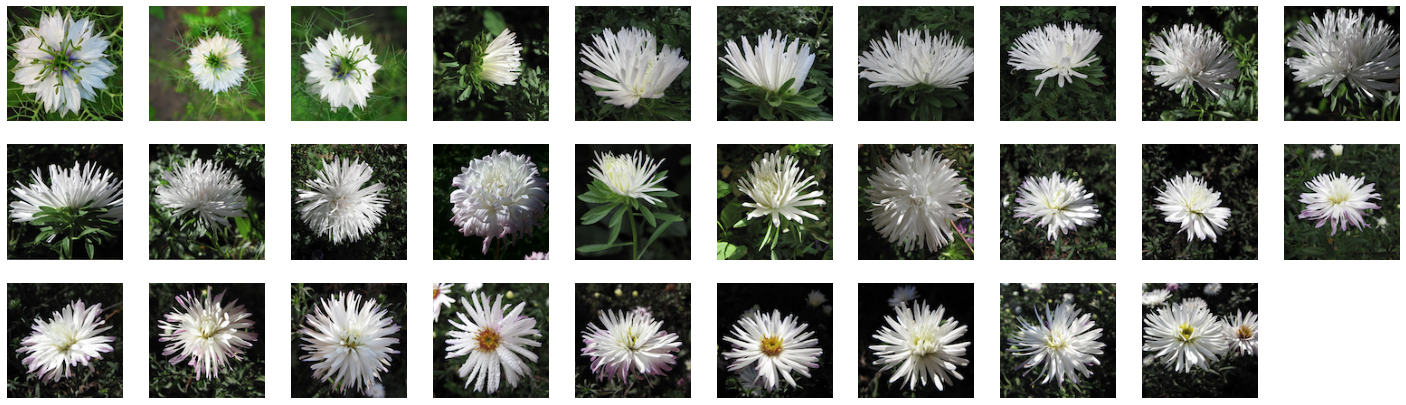

In [64]:
view_cluster(1)

Clipping cluster size from 68 to 30


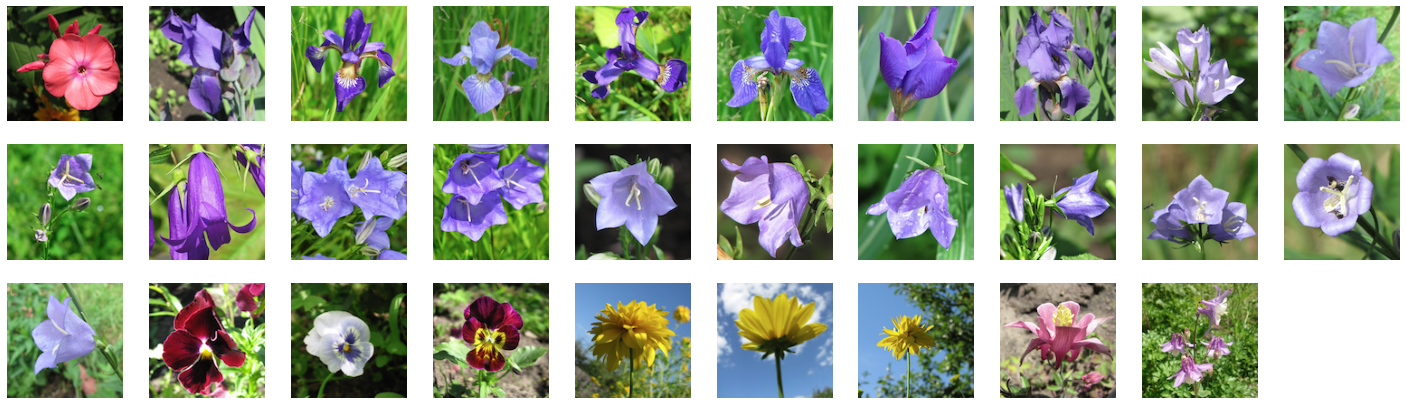

In [65]:
view_cluster(2)

Clipping cluster size from 70 to 30


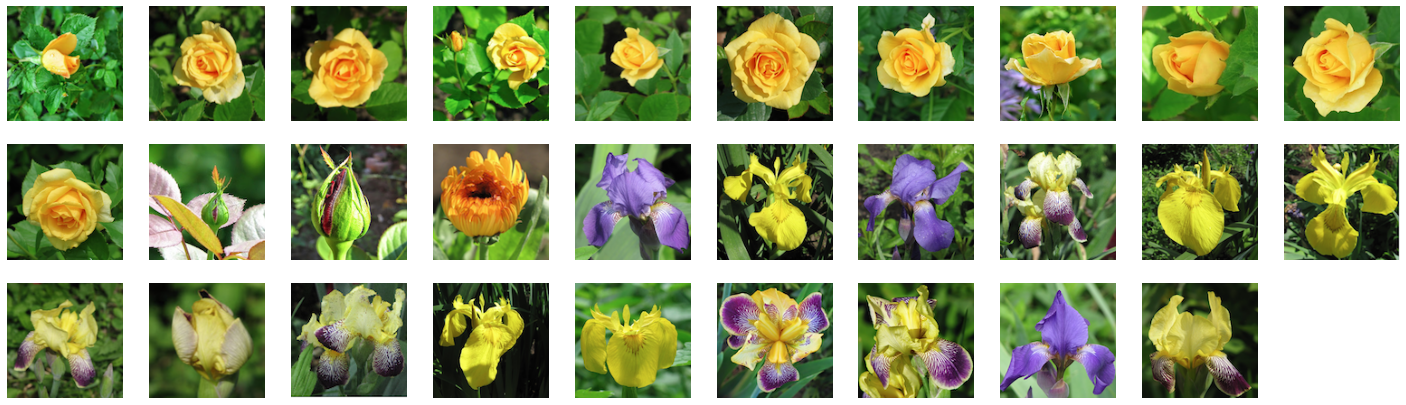

In [66]:
view_cluster(8)